## Лабораторная работа №3

Выполнить реализацию SGD в Numba и сравнить с реализацией в Лаб. Работе №1

## Функция Химмельблау

$$ f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $$

In [1]:
from typing import Tuple, Mapping

import numpy as np
import random
from matplotlib import pyplot as plt
import sklearn as skl
from sklearn import datasets
from IPython import display

In [2]:
#функция 1
def Himmelblau(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Химмельблау
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''
    return np.square(np.square(x)+y-11)+np.square(x+np.square(y)-7);

#градиент 1
def Himmelblau_Grad(x: np.float32, y: np.float32) -> np.array:
    return np.array([(4*x*(np.square(x)+y-11)+2*(x+np.square(y)-7)), (2*(np.square(x)+y-11)+4*y*(x+np.square(y)-7))]);

print('f(3, 2) = 0')
print('f(-2.805118, 3.131312) = 0')
print('f(-3.779310, -3.283186) = 0')
print('f(3.584428, -1.848126) = 0')
print('Himmelblau Result 1: ', Himmelblau(3, 2))
print('Himmelblau Result 2: ', Himmelblau(-2.805118, 3.131312))
print('Himmelblau Result 3: ', Himmelblau(-3.779310, -3.283186))
print('Himmelblau Result 4: ', Himmelblau(3.584428, -1.848126))
print('Himmelblau Gradient Result 1: ', Himmelblau_Grad(3, 2))
print('Himmelblau Gradient Result 2: ', Himmelblau_Grad(-2.805118, 3.131312))
print('Himmelblau Gradient Result 3: ', Himmelblau_Grad(-3.779310, -3.283186))
print('Himmelblau Gradient Result 4: ', Himmelblau_Grad(3.584428, -1.848126))

f(3, 2) = 0
f(-2.805118, 3.131312) = 0
f(-3.779310, -3.283186) = 0
f(3.584428, -1.848126) = 0
Himmelblau Result 1:  0
Himmelblau Result 2:  1.0989296656869089e-11
Himmelblau Result 3:  3.797861082863832e-12
Himmelblau Result 4:  8.894376497582423e-12
Himmelblau Gradient Result 1:  [0 0]
Himmelblau Gradient Result 2:  [ 4.97133560e-06 -4.15751018e-05]
Himmelblau Gradient Result 3:  [ 2.97052500e-05 -7.92677776e-06]
Himmelblau Gradient Result 4:  [-3.20016529e-05  1.30893338e-05]


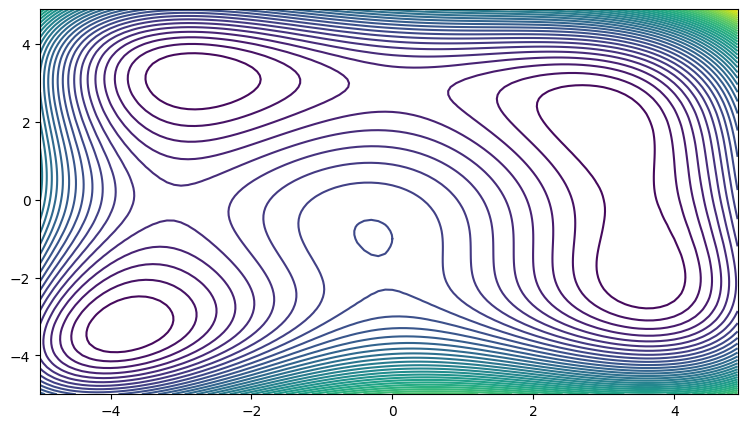

In [3]:
from matplotlib.ticker import MaxNLocator

# Изобразим функцию Химмельблау
grid_points = 100
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Himmelblau(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

levelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())
levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())

# Create figure
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(X, Y, Z, 50)
    
plt.show()

## Градиентный спуск

In [4]:
#GDF
def my_GD(f: Mapping, df: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          T: int = 100) -> Tuple [np.ndarray, np.ndarray, np.float32]:
    '''Моя простейшая реализация градиентного спуска.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
        Кортеж с координатой x, координатой y и результатом функции
    
    '''
    x_old = x0;
    y_old = y0;
    for i in range(T):
        # так стабильнее
        n=df(x0, y0)
        x_new = x_old - lr*n[0]
        y_new = y_old - lr*n[1]
        
    return x_new, y_new, f(x_new, y_new)

In [5]:
#набор точек
z, y = skl.datasets.make_blobs(n_samples=40000, centers=2, n_features=2, random_state=0)
y = np.zeros(40000)
x = np.zeros(40000)
# Нам нужно сравнить размерности массивов
#y=np.reshape(y,x.shape)
for i in range(len(z)):
    x[i],y[i] = z[i];
print('X: ', x)
print('Y: ', y)

X:  [ 1.58107779  2.02139889  1.74902357 ...  3.58479452 -0.5316157
  2.63024066]
Y:  [-0.21815247  0.41577863  1.10999246 ...  0.55144109  4.041054
 -0.3872784 ]


In [6]:
result = my_GD(Himmelblau, Himmelblau_Grad, x, y)
#gds_ind = np.argmin(result[2])
print('X: ', result[0])
print('Y: ', result[1])
print('Himmelblau Result: ', result[2])

X:  [ 2.23987973  2.64292905  2.30729932 ...  3.30256218 -0.84955542
  3.18482981]
Y:  [-0.09065633  0.62566677  1.42504858 ...  0.57202117  2.75237179
 -0.36326525]
Himmelblau Result:  [59.46912781 27.21315708 25.15964217 ... 11.58782931 56.71400556
 15.05472858]


## Реализация через Numba

In [7]:
import numba
from numba import jit

## Функция Химмельблау

$$ f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2 $$

In [8]:
#функция 1
@numba.njit(fastmath=True)
def Himmelblau_GPU(x: np.float32, y: np.float32) -> np.float64:
    '''
    Функция Химмельблау
    
    Args:
        x(np.ndarray): Аргумент 1
        y(np.ndarray): Аргумент 2
        
    Returns:
        np.float64: Результат функции
    '''
    return np.square(np.square(x)+y-11)+np.square(x+np.square(y)-7);

#градиент 1
@numba.njit(fastmath=True)
def Himmelblau_Grad_GPU_1(x: np.float32, y: np.float32) -> np.float64:
    return (4*x*(np.square(x)+y-11)+2*(x+np.square(y)-7))

#градиент 2
@numba.njit(fastmath=True)
def Himmelblau_Grad_GPU_2(x: np.float32, y: np.float32) -> np.float64:
    return (2*(np.square(x)+y-11)+4*y*(x+np.square(y)-7))

print('f(3, 2) = 0')
print('f(-2.805118, 3.131312) = 0')
print('f(-3.779310, -3.283186) = 0')
print('f(3.584428, -1.848126) = 0')
print('Himmelblau Result 1: ', Himmelblau_GPU(3, 2))
print('Himmelblau Result 2: ', Himmelblau_GPU(-2.805118, 3.131312))
print('Himmelblau Result 3: ', Himmelblau_GPU(-3.779310, -3.283186))
print('Himmelblau Result 4: ', Himmelblau_GPU(3.584428, -1.848126))

f(3, 2) = 0
f(-2.805118, 3.131312) = 0
f(-3.779310, -3.283186) = 0
f(3.584428, -1.848126) = 0
Himmelblau Result 1:  0
Himmelblau Result 2:  1.0989296654182172e-11
Himmelblau Result 3:  3.79786108288807e-12
Himmelblau Result 4:  8.894376494303697e-12


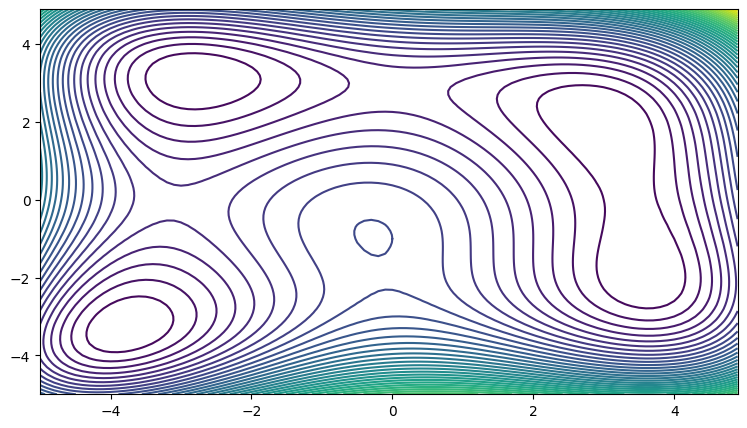

In [9]:
# Изобразим функцию Химмельблау
grid_points = 100
a = b = np.arange(-5.0, 5.0, 0.1)
X, Y = np.meshgrid(a, b)
# np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)
c = np.array(Himmelblau_GPU(np.ravel(X).reshape(a.size**2,1), np.ravel(Y).reshape(a.size**2,1)))
Z = c.reshape(X.shape)

levelsf = MaxNLocator(nbins=100).tick_values(Z.min(), Z.max())
levels = MaxNLocator(nbins=20).tick_values(Z.min(), Z.max())

# Create figure
fig, ax = plt.subplots(figsize=(9,5))
cs = ax.contour(X, Y, Z, 50)
    
plt.show()

In [10]:
#GDF
@numba.njit(fastmath=True, debug=True)
def my_GD_GPU(f: Mapping, df1: Mapping, df2: Mapping, x0: np.ndarray, y0: np.ndarray, lr: float = 0.01,
          T: int = 100) -> np.ndarray:
    '''Моя простейшая реализация градиентного спуска.
    
    Args:
        f (Mapping): Функционал для оптимизации
        df (Mapping): Градиент оптимизирующего функционала
        x0 (np.ndarray): Стартовая точка 1
        y0 (np.ndarray): Стартовая точка 2
        lr (float): Скорость обучения. Default=0,01.
        T (int): Количество итераций.
    
    Returns:
        Tuple [np.ndarray, np.ndarray, np.float32]: (x_optimal, f(x_optimal)).
    
    '''
    x_old = x0;
    y_old = y0;
    for i in range(T):
        # так стабильнее
        n1=df1(x0, y0)
        n2=df2(x0, y0)
        x_new = x_old - lr*n1
        y_new = y_old - lr*n2
        
    return f(x_new, y_new)

In [11]:
#набор точек
#z, y = skl.datasets.make_blobs(n_samples=40000, centers=2, n_features=2, random_state=0)
#y = np.zeros(40000)
#x = np.zeros(40000)
## Нам нужно сравнить размерности массивов
##y=np.reshape(y,x.shape)
#for i in range(len(z)):
#    x[i],y[i] = z[i];
#x, y

In [17]:
result_GPU = my_GD_GPU(Himmelblau_GPU, Himmelblau_Grad_GPU_1, Himmelblau_Grad_GPU_2, x, y)
#gds_ind_GPU = np.argmin(result[2])
print('X: ', x[0])
print('Y: ', y)
print('Himmelblau Result: ', result_GPU[0])

Himmelblau Result:  59.46912780922073


## Замер времени

In [13]:
import IPython

In [14]:
#CPU (Numpy)
%timeit -n100 my_GD(Himmelblau, Himmelblau_Grad, x, y)

20.6 ms ± 228 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [15]:
#GPU (Numba)
%timeit -n100 my_GD_GPU(Himmelblau_GPU, Himmelblau_Grad_GPU_1, Himmelblau_Grad_GPU_2, x, y)

15.1 ms ± 725 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
